In [1]:
# Dependencies 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import random
from citipy import citipy
from datetime import datetime 
from config import weather_api_key
import requests
import time
from scipy.stats import linregress

In [2]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [4]:
# Create 1500 random latitude and longitude coordinates 
latitudes = np.random.uniform(-90, 90, size = 1500)
longitudes = np.random.uniform(-180, 180, size = 1500)
coordinates = zip(latitudes, longitudes)
coordinates

In [5]:
# Add coordinates to a list 
coordinates_list = list(coordinates)

In [6]:
# Create list for cities 
cities = []

# Use citipy to find nearest cities using coordinate list
for coordinate in coordinates_list:
    city = citipy.nearest_city(coordinate[0],coordinate[1])
    city_name = city.city_name
    country_name = city.country_code
    
    # Find unique cities to add to cities list
    if city_name not in cities:
        cities.append(city_name)
    
    # See cities and contries
    # print(f'{city_name}, {country_name}')

# Count amount of unique cities
len(cities)

588

In [7]:
# Loop through city Lists 
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1 
        record_count = 1 
    
    # Log the URL, record, and set numbers and the city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log URL, set, and record numbers for each city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
   
    # Add 1 to the record count.
    record_count += 1

Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | tasiilaq
Processing Record 4 of Set 1 | nikolskoye
Processing Record 5 of Set 1 | taolanaro
Processing Record 6 of Set 1 | sao filipe
Processing Record 7 of Set 1 | fort nelson
Processing Record 8 of Set 1 | saint-philippe
Processing Record 9 of Set 1 | muzhi
Processing Record 10 of Set 1 | soyo
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | praya
Processing Record 13 of Set 1 | luanda
Processing Record 14 of Set 1 | butaritari
Processing Record 15 of Set 1 | solovetskiy
Processing Record 16 of Set 1 | nakamura
Processing Record 17 of Set 1 | chifeng
Processing Record 18 of Set 1 | sinyavino
Processing Record 19 of Set 1 | tezu
Processing Record 20 of Set 1 | domoni
Processing Record 21 of Set 1 | hermanus
Processing Record 22 of Set 1 | mataura
Processing Record 23 of Set 1 | lobez
Processing Record 24 of Set 1 | georgetown
Processing Record 25 of Se

In [8]:
# Loop through city Lists 
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes. 
    if (i % 50 == 0 and i >= 50):
        set_count += 1 
        record_count = 1 
    
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities. 
    try:
       
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()

        # Parse out the needed data.
        city_city = city.title()
        city_country = city_weather['sys']['country']
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_hum = city_weather['main']['humidity']
        city_cloud = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')

        # Append the city information into city_data list. 
        city_data.append({"City": city_city,
                         "Country": city_country,
                         "Date": city_date,
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_hum,
                         "Cloudiness": city_cloud,
                         "Wind Speed": city_wind,
                         })
    # If an error is experienced, skip the city.
    except: 
        print("City not found. Skipping...")
        pass

    # Complete Data Retrieval    
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 39 of Set 12 | ushuaia
Processing Record 40 of Set 12 | rikitea
Processing Record 41 of Set 12 | tasiilaq
Processing Record 42 of Set 12 | nikolskoye
Processing Record 43 of Set 12 | taolanaro
City not found. Skipping...
Processing Record 44 of Set 12 | sao filipe
Processing Record 45 of Set 12 | fort nelson
Processing Record 46 of Set 12 | saint-philippe
Processing Record 47 of Set 12 | muzhi
Processing Record 48 of Set 12 | soyo
Processing Record 49 of Set 12 | bredasdorp
Processing Record 50 of Set 12 | praya
Processing Record 51 of Set 12 | luanda
Processing Record 52 of Set 12 | butaritari
Processing Record 53 of Set 12 | solovetskiy
City not found. Skipping...
Processing Record 54 of Set 12 | nakamura
Processing Record 55 of Set 12 | chifeng
Processing Record 56 of Set 12 | sinyavino
Processing Record 57 of Set 12 | tezu
Processing Record 58 of Set 12 | domoni
Processing Record 59 of Set 12 | hermanus
Processing Record 60 of Set 12 | mataura
Processing Record 61

Processing Record 32 of Set 15 | sehithwa
Processing Record 33 of Set 15 | kysyl-syr
Processing Record 34 of Set 15 | nizwa
Processing Record 35 of Set 15 | awjilah
Processing Record 36 of Set 15 | nizhniy kuranakh
Processing Record 37 of Set 15 | naze
Processing Record 38 of Set 15 | hasaki
Processing Record 39 of Set 15 | bathsheba
Processing Record 40 of Set 15 | griffith
Processing Record 41 of Set 15 | padang
Processing Record 42 of Set 15 | touros
Processing Record 43 of Set 15 | sao jose da coroa grande
Processing Record 44 of Set 15 | coahuayana
Processing Record 45 of Set 15 | mbacke
City not found. Skipping...
Processing Record 46 of Set 15 | pacifica
Processing Record 47 of Set 15 | lebu
Processing Record 48 of Set 15 | morgan city
Processing Record 49 of Set 15 | vestmannaeyjar
Processing Record 50 of Set 15 | leningradskiy
Processing Record 1 of Set 16 | okhotsk
Processing Record 2 of Set 16 | hilo
Processing Record 3 of Set 16 | new norfolk
Processing Record 4 of Set 16 |

Processing Record 14 of Set 19 | tilichiki
Processing Record 15 of Set 19 | meulaboh
Processing Record 16 of Set 19 | nenjiang
Processing Record 17 of Set 19 | attawapiskat
City not found. Skipping...
Processing Record 18 of Set 19 | baherden
Processing Record 19 of Set 19 | nishihara
Processing Record 20 of Set 19 | povenets
Processing Record 21 of Set 19 | ambulu
Processing Record 22 of Set 19 | upata
Processing Record 23 of Set 19 | san nicolas
Processing Record 24 of Set 19 | san jose
Processing Record 25 of Set 19 | morrope
Processing Record 26 of Set 19 | bafq
Processing Record 27 of Set 19 | khagrachari
City not found. Skipping...
Processing Record 28 of Set 19 | suez
Processing Record 29 of Set 19 | kollumerland
City not found. Skipping...
Processing Record 30 of Set 19 | san felipe
Processing Record 31 of Set 19 | lishui
Processing Record 32 of Set 19 | paamiut
Processing Record 33 of Set 19 | eyl
Processing Record 34 of Set 19 | kaitangata
Processing Record 35 of Set 19 | sal

Processing Record 50 of Set 22 | richards bay
Processing Record 1 of Set 23 | cayenne
Processing Record 2 of Set 23 | uvat
Processing Record 3 of Set 23 | sandakan
Processing Record 4 of Set 23 | viedma
Processing Record 5 of Set 23 | pochutla
Processing Record 6 of Set 23 | moerai
Processing Record 7 of Set 23 | constitucion
Processing Record 8 of Set 23 | mitsamiouli
Processing Record 9 of Set 23 | nabinagar
Processing Record 10 of Set 23 | kudahuvadhoo
Processing Record 11 of Set 23 | lazaro cardenas
Processing Record 12 of Set 23 | ust-maya
Processing Record 13 of Set 23 | shihezi
Processing Record 14 of Set 23 | moncao
Processing Record 15 of Set 23 | soe
Processing Record 16 of Set 23 | stanari
Processing Record 17 of Set 23 | northam
Processing Record 18 of Set 23 | cognac
Processing Record 19 of Set 23 | samusu
City not found. Skipping...
Processing Record 20 of Set 23 | sal rei
Processing Record 21 of Set 23 | ozinki
Processing Record 22 of Set 23 | mackenzie
Processing Record

In [9]:
len(city_data)

534

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2021-09-27 00:37:32,-54.8000,-68.3000,40.66,60,0,8.05
1,Rikitea,PF,2021-09-27 00:37:33,-23.1203,-134.9692,73.78,72,2,19.42
2,Tasiilaq,GL,2021-09-27 00:37:33,65.6145,-37.6368,33.96,68,15,5.28
3,Nikolskoye,RU,2021-09-27 00:37:33,59.7035,30.7861,49.89,98,39,4.34
4,Sao Filipe,CV,2021-09-27 00:37:34,14.8961,-24.4956,78.58,80,87,5.23


In [11]:
# Create the output file (CSV).
output_data_file = "cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

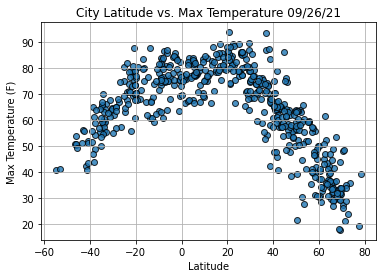

In [18]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Fig1.png")

# Show plot.
plt.show()

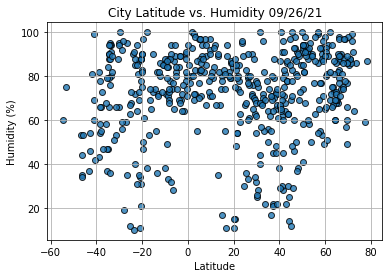

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig2.png")
# Show plot.
plt.show()

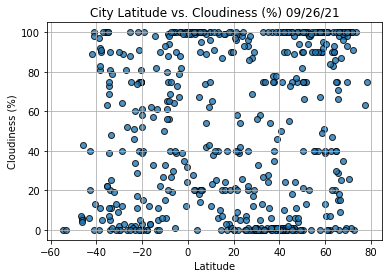

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig3.png")
# Show plot.
plt.show()

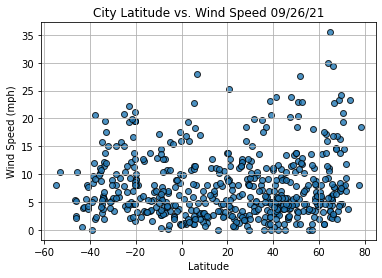

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig4.png")
# Show plot.
plt.show()

In [26]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

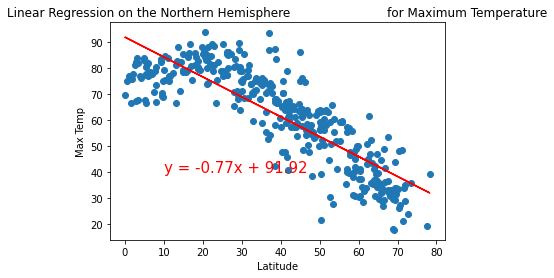

<Figure size 432x288 with 0 Axes>

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))
plt.savefig("Figure5.png")

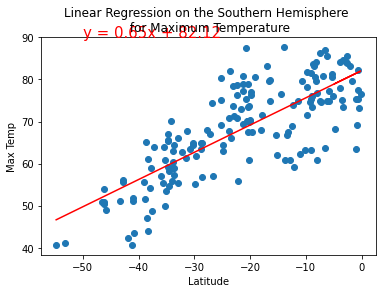

<Figure size 432x288 with 0 Axes>

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))
plt.savefig("Figure6.png")

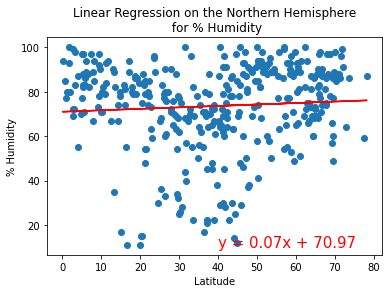

<Figure size 432x288 with 0 Axes>

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for % Humidity', '% Humidity',(40,10))
plt.savefig("Figure7.png")

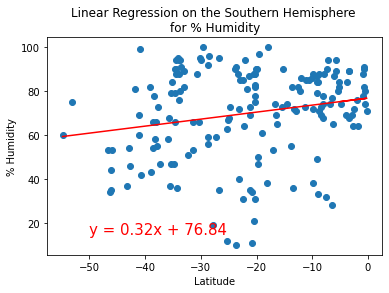

<Figure size 432x288 with 0 Axes>

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))
plt.savefig("Figure8.png")

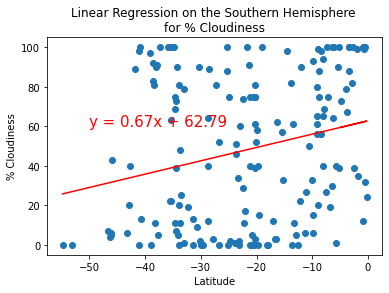

<Figure size 432x288 with 0 Axes>

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))
plt.savefig("Figure9.png")

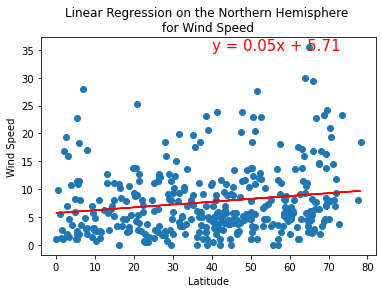

<Figure size 432x288 with 0 Axes>

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))
plt.savefig("Figure11.png")

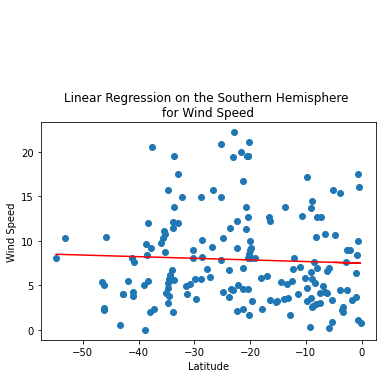

<Figure size 432x288 with 0 Axes>

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,35))
plt.savefig("Figure12.png")